In [73]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
import missingno as msno #Visualisation Matrix NaNs

### **STEPS**

Dataframe about Coronavirus Group D

In [74]:
world = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
print(world["date"][-1:])
world

62046    2021-01-24
Name: date, dtype: object


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62042,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,736.000,879.0,54.0,41.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62043,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62044,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,630.571,962.0,45.0,42.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62045,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,589.429,974.0,12.0,41.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [30]:
#Aquí los NaNs de todo el df

world.isnull().sum()

iso_code                                   353
continent                                  722
location                                     0
date                                         0
total_cases                                597
new_cases                                  604
new_cases_smoothed                        1563
total_deaths                              9134
new_deaths                                9135
new_deaths_smoothed                       1563
total_cases_per_million                    950
new_cases_per_million                      957
new_cases_smoothed_per_million            1911
total_deaths_per_million                  9474
new_deaths_per_million                    9475
new_deaths_smoothed_per_million           1911
reproduction_rate                        13291
icu_patients                             55191
icu_patients_per_million                 55191
hosp_patients                            53933
hosp_patients_per_million                53933
weekly_icu_ad

In [75]:
#df completo con las columnas que hemos aprovado con el criterio de menos NaNs para hacer las tendencias!!!

world = world.drop(world.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "new_cases_per_million", "total_deaths_per_million", "aged_65_older", "population", "population_density", "cardiovasc_death_rate", "hospital_beds_per_thousand", "life_expectancy"]), 1)
world

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_per_million,total_deaths_per_million,population,population_density,aged_65_older,cardiovasc_death_rate,hospital_beds_per_thousand,life_expectancy
0,AFG,2020-02-24,1.0,1.0,NaN,NaN,0.026,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
1,AFG,2020-02-25,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
2,AFG,2020-02-26,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
3,AFG,2020-02-27,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
4,AFG,2020-02-28,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62042,ZWE,2021-01-20,29408.0,733.0,879.0,54.0,49.317,59.140,14862927.0,42.729,2.822,307.846,1.7,61.49
62043,ZWE,2021-01-21,30047.0,639.0,917.0,38.0,42.993,61.697,14862927.0,42.729,2.822,307.846,1.7,61.49
62044,ZWE,2021-01-22,30523.0,476.0,962.0,45.0,32.026,64.725,14862927.0,42.729,2.822,307.846,1.7,61.49
62045,ZWE,2021-01-23,31007.0,484.0,974.0,12.0,32.564,65.532,14862927.0,42.729,2.822,307.846,1.7,61.49


In [84]:
world_2 = world.groupby("iso_code").mean()
world_2.rank()
countries_list = ["GBR", "PRT", "TUR", "ESP", "VEN"]
world_2.loc[(world_2.index=="ESP")] #and (world_2.index=="GBR") and (world_2.index=="VEN") and (world_2.index=="PRT") and (world_2.index=="TUR")]

,total_cases,new_cases,total_deaths,new_deaths,new_cases_per_million,total_deaths_per_million,population,population_density,aged_65_older,cardiovasc_death_rate,hospital_beds_per_thousand,life_expectancy
iso_code,,,,,,,,,,,,
ESP,665379.590529,6962.562674,30453.179878,169.027439,148.916579,651.338277,46754783.0,93.105,19.436,99.403,2.97,83.56


In [78]:
ax = world_2.head(10).plot()
ax.set_xlabel(world_2.index)
ax.set_ylabel(world_2["life_expectancy"])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [62]:
life = world_2["life_expectancy"].drop('OWID_WRL')
life

iso_code
AFG    64.83
AGO    61.15
ALB    78.57
AND    83.73
ARE    77.97
       ...  
WSM    73.32
YEM    66.12
ZAF    64.13
ZMB    63.89
ZWE    61.49
Name: life_expectancy, Length: 191, dtype: float64

In [ ]:
world_2groupby("iso_code").mean("life_expectancy")

In [70]:
sns.set_theme(style="whitegrid")
world_2 = sns.load_dataset(world)

# Draw a nested barplot by species and sex
g = sns.catplot(data=world_2, kind="bar", x=world_2["iso_code"], y=world_2["life_expectancy"], hue="old", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
#countries = [(life[life["iso_code"]=="GBR"]) and (life[life["iso_code"]=="PRT"]) and (life[life["iso_code"]=="VEN"]) and (life[life["iso_code"]=="TUR"]) and (life[life["iso_code"]=="ESP"])]

TypeError: load_dataset() missing 1 required positional argument: 'name'

In [46]:
life = world_2["life_expectancy"]
countries = world_2.index
life.plot.scatter(x=countries, y=life)

ValueError: plot kind scatter can only be used for data frames

### **TO DELETE NaN's IN 5 DF's ABOUT COUNTRIES**

In [33]:
uk = world[world["iso_code"]=="GBR"]

uk = uk.drop(uk.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_deaths_per_million", "life_expectancy"]), 1)
uk

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
58315,GBR,2020-01-31,2.0,2.0,NaN,NaN,NaN,81.32
58316,GBR,2020-02-01,2.0,0.0,NaN,NaN,NaN,81.32
58317,GBR,2020-02-02,2.0,0.0,NaN,NaN,NaN,81.32
58318,GBR,2020-02-03,8.0,6.0,NaN,NaN,NaN,81.32
58319,GBR,2020-02-04,8.0,0.0,NaN,NaN,NaN,81.32
...,...,...,...,...,...,...,...,...
58670,GBR,2021-01-20,3515796.0,38992.0,93469.0,1826.0,1376.852,81.32
58671,GBR,2021-01-21,3553773.0,37977.0,94765.0,1296.0,1395.943,81.32
58672,GBR,2021-01-22,3594094.0,40321.0,96166.0,1401.0,1416.581,81.32
58673,GBR,2021-01-23,3627746.0,33652.0,97518.0,1352.0,1436.496,81.32


In [34]:
uk.isnull().sum()

iso_code                     0
date                         0
total_cases                  0
new_cases                    0
total_deaths                35
new_deaths                  35
total_deaths_per_million    35
life_expectancy              0
dtype: int64

In [8]:
GBR = uk.dropna(how= "any", inplace = False)
GBR

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
57081,GBR,2020-03-06,374.0,79.0,1.0,1.0,0.015,81.32
57082,GBR,2020-03-07,429.0,55.0,2.0,1.0,0.029,81.32
57083,GBR,2020-03-08,483.0,54.0,2.0,0.0,0.029,81.32
57084,GBR,2020-03-09,630.0,147.0,3.0,1.0,0.044,81.32
57085,GBR,2020-03-10,889.0,259.0,7.0,4.0,0.103,81.32
...,...,...,...,...,...,...,...,...
57394,GBR,2021-01-13,3220953.0,47662.0,84910.0,1568.0,1250.773,81.32
57395,GBR,2021-01-14,3269757.0,48804.0,86163.0,1253.0,1269.231,81.32
57396,GBR,2021-01-15,3325642.0,55885.0,87448.0,1285.0,1288.159,81.32
57397,GBR,2021-01-16,3367070.0,41428.0,88747.0,1299.0,1307.295,81.32


In [9]:
port = world[world["iso_code"]=="PRT"]

port = port.drop(port.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_deaths_per_million", "life_expectancy"]), 1)
port

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
43593,PRT,2020-02-02,NaN,NaN,NaN,NaN,NaN,82.05
43594,PRT,2020-02-09,NaN,NaN,NaN,NaN,NaN,82.05
43595,PRT,2020-02-15,NaN,NaN,NaN,NaN,NaN,82.05
43596,PRT,2020-02-23,NaN,NaN,NaN,NaN,NaN,82.05
43597,PRT,2020-03-01,NaN,NaN,NaN,NaN,NaN,82.05
...,...,...,...,...,...,...,...,...
43915,PRT,2021-01-13,507108.0,10556.0,8236.0,156.0,807.712,82.05
43916,PRT,2021-01-14,517806.0,10698.0,8384.0,148.0,822.226,82.05
43917,PRT,2021-01-15,528469.0,10663.0,8543.0,159.0,837.820,82.05
43918,PRT,2021-01-16,539416.0,10947.0,8709.0,166.0,854.099,82.05


In [10]:
port.isnull().sum()

iso_code                     0
date                         0
total_cases                  5
new_cases                    5
total_deaths                20
new_deaths                  20
total_deaths_per_million    20
life_expectancy              0
dtype: int64

In [11]:
PRT = port.dropna(how= "any", inplace = False)
PRT

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
43613,PRT,2020-03-17,448.0,117.0,1.0,1.0,0.098,82.05
43614,PRT,2020-03-18,448.0,0.0,2.0,1.0,0.196,82.05
43615,PRT,2020-03-19,785.0,337.0,3.0,1.0,0.294,82.05
43616,PRT,2020-03-20,1020.0,235.0,6.0,3.0,0.588,82.05
43617,PRT,2020-03-21,1280.0,260.0,12.0,6.0,1.177,82.05
...,...,...,...,...,...,...,...,...
43915,PRT,2021-01-13,507108.0,10556.0,8236.0,156.0,807.712,82.05
43916,PRT,2021-01-14,517806.0,10698.0,8384.0,148.0,822.226,82.05
43917,PRT,2021-01-15,528469.0,10663.0,8543.0,159.0,837.820,82.05
43918,PRT,2021-01-16,539416.0,10947.0,8709.0,166.0,854.099,82.05


In [12]:
turk = world[world["iso_code"]=="TUR"]

turk = turk.drop(turk.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_deaths_per_million", "life_expectancy"]), 1)
turk

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
55753,TUR,2020-03-11,1.0,1.0,NaN,NaN,NaN,77.69
55754,TUR,2020-03-12,1.0,0.0,NaN,NaN,NaN,77.69
55755,TUR,2020-03-13,5.0,4.0,NaN,NaN,NaN,77.69
55756,TUR,2020-03-14,5.0,0.0,NaN,NaN,NaN,77.69
55757,TUR,2020-03-15,6.0,1.0,NaN,NaN,NaN,77.69
...,...,...,...,...,...,...,...,...
56062,TUR,2021-01-14,2364801.0,8962.0,23495.0,170.0,278.578,77.69
56063,TUR,2021-01-15,2373115.0,8314.0,23664.0,169.0,280.582,77.69
56064,TUR,2021-01-16,2380665.0,7550.0,23832.0,168.0,282.574,77.69
56065,TUR,2021-01-17,2387101.0,6436.0,23997.0,165.0,284.530,77.69


In [13]:
turk.isnull().sum()

iso_code                    0
date                        0
total_cases                 1
new_cases                   2
total_deaths                7
new_deaths                  7
total_deaths_per_million    7
life_expectancy             0
dtype: int64

In [14]:
TUR = turk.dropna(how= "any", inplace = False)
TUR

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
55759,TUR,2020-03-17,47.0,29.0,1.0,1.0,0.012,77.69
55760,TUR,2020-03-18,98.0,51.0,1.0,0.0,0.012,77.69
55761,TUR,2020-03-19,192.0,94.0,3.0,2.0,0.036,77.69
55762,TUR,2020-03-20,359.0,167.0,4.0,1.0,0.047,77.69
55763,TUR,2020-03-21,670.0,311.0,9.0,5.0,0.107,77.69
...,...,...,...,...,...,...,...,...
56061,TUR,2021-01-13,2355839.0,9554.0,23325.0,173.0,276.562,77.69
56062,TUR,2021-01-14,2364801.0,8962.0,23495.0,170.0,278.578,77.69
56063,TUR,2021-01-15,2373115.0,8314.0,23664.0,169.0,280.582,77.69
56064,TUR,2021-01-16,2380665.0,7550.0,23832.0,168.0,282.574,77.69


In [15]:
esp = world[world["iso_code"]=="ESP"]

esp = esp.drop(esp.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_deaths_per_million", "life_expectancy"]), 1)
esp

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
50838,ESP,2020-02-01,1.0,1.0,NaN,NaN,NaN,83.56
50839,ESP,2020-02-02,1.0,0.0,NaN,NaN,NaN,83.56
50840,ESP,2020-02-03,1.0,0.0,NaN,NaN,NaN,83.56
50841,ESP,2020-02-04,1.0,0.0,NaN,NaN,NaN,83.56
50842,ESP,2020-02-05,1.0,0.0,NaN,NaN,NaN,83.56
...,...,...,...,...,...,...,...,...
51185,ESP,2021-01-13,2176089.0,38869.0,52878.0,195.0,1130.965,83.56
51186,ESP,2021-01-14,2211967.0,35878.0,53079.0,201.0,1135.264,83.56
51187,ESP,2021-01-15,2252164.0,40197.0,53314.0,235.0,1140.290,83.56
51188,ESP,2021-01-16,2252164.0,0.0,53314.0,0.0,1140.290,83.56


In [16]:
esp.isnull().sum()

iso_code                     0
date                         0
total_cases                  0
new_cases                    0
total_deaths                31
new_deaths                  31
total_deaths_per_million    31
life_expectancy              0
dtype: int64

In [17]:
ESP = esp.dropna(how= "any", inplace = False)
ESP

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
50869,ESP,2020-03-03,165.0,45.0,1.0,1.0,0.021,83.56
50870,ESP,2020-03-04,222.0,57.0,2.0,1.0,0.043,83.56
50871,ESP,2020-03-05,259.0,37.0,3.0,1.0,0.064,83.56
50872,ESP,2020-03-06,400.0,141.0,5.0,2.0,0.107,83.56
50873,ESP,2020-03-07,500.0,100.0,10.0,5.0,0.214,83.56
...,...,...,...,...,...,...,...,...
51185,ESP,2021-01-13,2176089.0,38869.0,52878.0,195.0,1130.965,83.56
51186,ESP,2021-01-14,2211967.0,35878.0,53079.0,201.0,1135.264,83.56
51187,ESP,2021-01-15,2252164.0,40197.0,53314.0,235.0,1140.290,83.56
51188,ESP,2021-01-16,2252164.0,0.0,53314.0,0.0,1140.290,83.56


In [18]:
ven = world[world["iso_code"]=="VEN"]

ven = ven.drop(ven.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_deaths_per_million", "life_expectancy"]), 1)
ven

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
58768,VEN,2020-03-14,2.0,2.0,NaN,NaN,NaN,72.06
58769,VEN,2020-03-15,10.0,8.0,NaN,NaN,NaN,72.06
58770,VEN,2020-03-16,17.0,7.0,NaN,NaN,NaN,72.06
58771,VEN,2020-03-17,33.0,16.0,NaN,NaN,NaN,72.06
58772,VEN,2020-03-18,36.0,3.0,NaN,NaN,NaN,72.06
...,...,...,...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,512.0,1084.0,6.0,38.121,72.06
59074,VEN,2021-01-14,118415.0,604.0,1090.0,6.0,38.332,72.06
59075,VEN,2021-01-15,118856.0,441.0,1095.0,5.0,38.508,72.06
59076,VEN,2021-01-16,119306.0,450.0,1101.0,6.0,38.719,72.06


In [19]:
ven.isnull().sum()

iso_code                     0
date                         0
total_cases                  0
new_cases                    0
total_deaths                13
new_deaths                  13
total_deaths_per_million    13
life_expectancy              0
dtype: int64

In [20]:
VEN = ven.dropna(how= "any", inplace = False)
VEN

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
58781,VEN,2020-03-27,107.0,0.0,1.0,1.0,0.035,72.06
58782,VEN,2020-03-28,119.0,12.0,2.0,1.0,0.070,72.06
58783,VEN,2020-03-29,119.0,0.0,2.0,0.0,0.070,72.06
58784,VEN,2020-03-30,135.0,16.0,3.0,1.0,0.106,72.06
58785,VEN,2020-03-31,135.0,0.0,3.0,0.0,0.106,72.06
...,...,...,...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,512.0,1084.0,6.0,38.121,72.06
59074,VEN,2021-01-14,118415.0,604.0,1090.0,6.0,38.332,72.06
59075,VEN,2021-01-15,118856.0,441.0,1095.0,5.0,38.508,72.06
59076,VEN,2021-01-16,119306.0,450.0,1101.0,6.0,38.719,72.06


### **TO CONCAT 5 DF's ABOUT COUNTRIES**

In [93]:
#To concat 5 df's

df10 = pd.concat([GBR, PRT, TUR, ESP, VEN])
df10

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
57081,GBR,2020-03-06,374.0,79.0,1.0,1.0,0.015,81.32
57082,GBR,2020-03-07,429.0,55.0,2.0,1.0,0.029,81.32
57083,GBR,2020-03-08,483.0,54.0,2.0,0.0,0.029,81.32
57084,GBR,2020-03-09,630.0,147.0,3.0,1.0,0.044,81.32
57085,GBR,2020-03-10,889.0,259.0,7.0,4.0,0.103,81.32
...,...,...,...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,512.0,1084.0,6.0,38.121,72.06
59074,VEN,2021-01-14,118415.0,604.0,1090.0,6.0,38.332,72.06
59075,VEN,2021-01-15,118856.0,441.0,1095.0,5.0,38.508,72.06
59076,VEN,2021-01-16,119306.0,450.0,1101.0,6.0,38.719,72.06


In [94]:
df10.dropna(how="any", inplace=False)
df10

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
57081,GBR,2020-03-06,374.0,79.0,1.0,1.0,0.015,81.32
57082,GBR,2020-03-07,429.0,55.0,2.0,1.0,0.029,81.32
57083,GBR,2020-03-08,483.0,54.0,2.0,0.0,0.029,81.32
57084,GBR,2020-03-09,630.0,147.0,3.0,1.0,0.044,81.32
57085,GBR,2020-03-10,889.0,259.0,7.0,4.0,0.103,81.32
...,...,...,...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,512.0,1084.0,6.0,38.121,72.06
59074,VEN,2021-01-14,118415.0,604.0,1090.0,6.0,38.332,72.06
59075,VEN,2021-01-15,118856.0,441.0,1095.0,5.0,38.508,72.06
59076,VEN,2021-01-16,119306.0,450.0,1101.0,6.0,38.719,72.06


**ABOUT LIFE EXPECTANCY**

In [97]:
df10["life_expectancy"].isnull()

57081    False
57082    False
57083    False
57084    False
57085    False
         ...  
59073    False
59074    False
59075    False
59076    False
59077    False
Name: life_expectancy, Length: 1549, dtype: bool

In [101]:
df10.groupby("iso_code").mean("life_expectancy")

,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
iso_code,,,,,,
ESP,690953.433022,7015.713396,29921.183801,166.087227,639.959854,83.56
GBR,706570.962264,10708.946541,40391.581761,281.223270,594.991305,81.32
PRT,119303.771987,1789.804560,2435.355049,28.863192,238.837388,82.05
TUR,484732.104575,5110.647059,7947.352941,77.702614,94.231013,77.69
VEN,48073.949495,403.016835,419.444444,3.723906,14.750589,72.06


In [102]:
df10.groupby("iso_code").mean("life_expectancy").rank()
#Countries with more resources have a life expectancy more hight than others countries.

,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,life_expectancy
iso_code,,,,,,
ESP,4.0,4.0,4.0,4.0,5.0,5.0
GBR,5.0,5.0,5.0,5.0,4.0,3.0
PRT,2.0,2.0,2.0,2.0,3.0,4.0
TUR,3.0,3.0,3.0,3.0,2.0,2.0
VEN,1.0,1.0,1.0,1.0,1.0,1.0


### **TO GROUPBY 5 DF's ABOUT COUNTRIES**

In [22]:
#Q10 = df10.join(world["life_expectancy"])
#To groupby iso_code

Countries5 = df10.groupby("iso_code").agg({"new_cases": [sum], "new_deaths": [sum], "total_cases": [max], "total_deaths": [max]})
#Countries5 = Countries5.join(df10.groupby("life_expectancy").mean())
Countries5

,new_cases,new_deaths,total_cases,total_deaths
,sum,sum,max,max
iso_code,,,,
ESP,2252044.0,53314.0,2252164.0,53314.0
GBR,3405445.0,89429.0,3405740.0,89429.0
PRT,549470.0,8861.0,549801.0,8861.0
TUR,1563858.0,23777.0,2387101.0,23997.0
VEN,119696.0,1106.0,119803.0,1106.0


In [51]:
Countries5[('total_deaths', 'max')]

iso_code
ESP    53314.0
GBR    89429.0
PRT     8861.0
TUR    23997.0
VEN     1106.0
Name: (total_deaths, max), dtype: float64

In [47]:
from scipy import stats
Countries5[(np.abs(stats.zscore(Countries5)) < 1000).all(axis=1)]

,new_cases,new_deaths,total_cases,total_deaths
,sum,sum,max,max
iso_code,,,,
ESP,2252044.0,53314.0,2252164.0,53314.0
GBR,3405445.0,89429.0,3405740.0,89429.0
PRT,549470.0,8861.0,549801.0,8861.0
TUR,1563858.0,23777.0,2387101.0,23997.0
VEN,119696.0,1106.0,119803.0,1106.0


<AxesSubplot:xlabel="('total_deaths', 'max')">

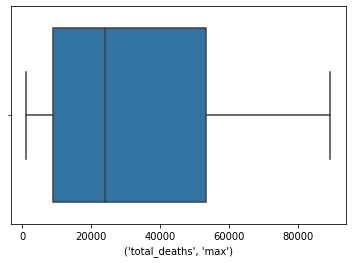

In [56]:
sns.boxplot(x=Countries5[('total_deaths', 'max')])

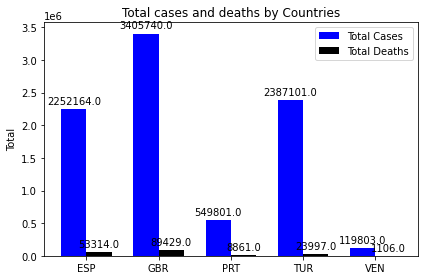

In [54]:
labels = Countries5.index
total_cases = Countries5[( 'total_cases', 'max')]
total_deaths = Countries5[('total_deaths', 'max')]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_cases, width, label='Total Cases', color="b")
rects2 = ax.bar(x + width/2, total_deaths, width, label='Total Deaths', color="k")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Total cases and deaths by Countries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [24]:
world["new_date"] = pd.to_datetime(world["date"], format="%Y/%m/%d")
world["new_date"]

0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
60689   2021-01-13
60690   2021-01-14
60691   2021-01-15
60692   2021-01-16
60693   2021-01-17
Name: new_date, Length: 60694, dtype: datetime64[ns]

In [24]:
suma_total_deaths = world["new_deaths"].sum(skipna = True)
suma_total_deaths

4061576.0

In [36]:
#df_posicion = world.groupby("iso_code").sum("new_deaths", "new_cases").dropna(how= "any", inplace = False).drop(world.columns.difference(["iso_code","date",'total_cases',"total_deaths", "life_expectancy"]), 1)
df_posicion = world.groupby("iso_code").sum(["new_deaths", "new_cases"]).drop(world.columns.difference(["iso_code","date","new_cases", "new_deaths"]), 1)
"""df_posicion = df_posicion.columns.astype(int)"""
df_posicion

,new_cases,new_deaths
iso_code,,
AFG,53984.0,2339.0
AGO,18875.0,436.0
ALB,67690.0,1277.0
AND,9083.0,91.0
ARE,253261.0,745.0
...,...,...
WSM,2.0,0.0
YEM,2112.0,612.0
ZAF,1337926.0,37105.0


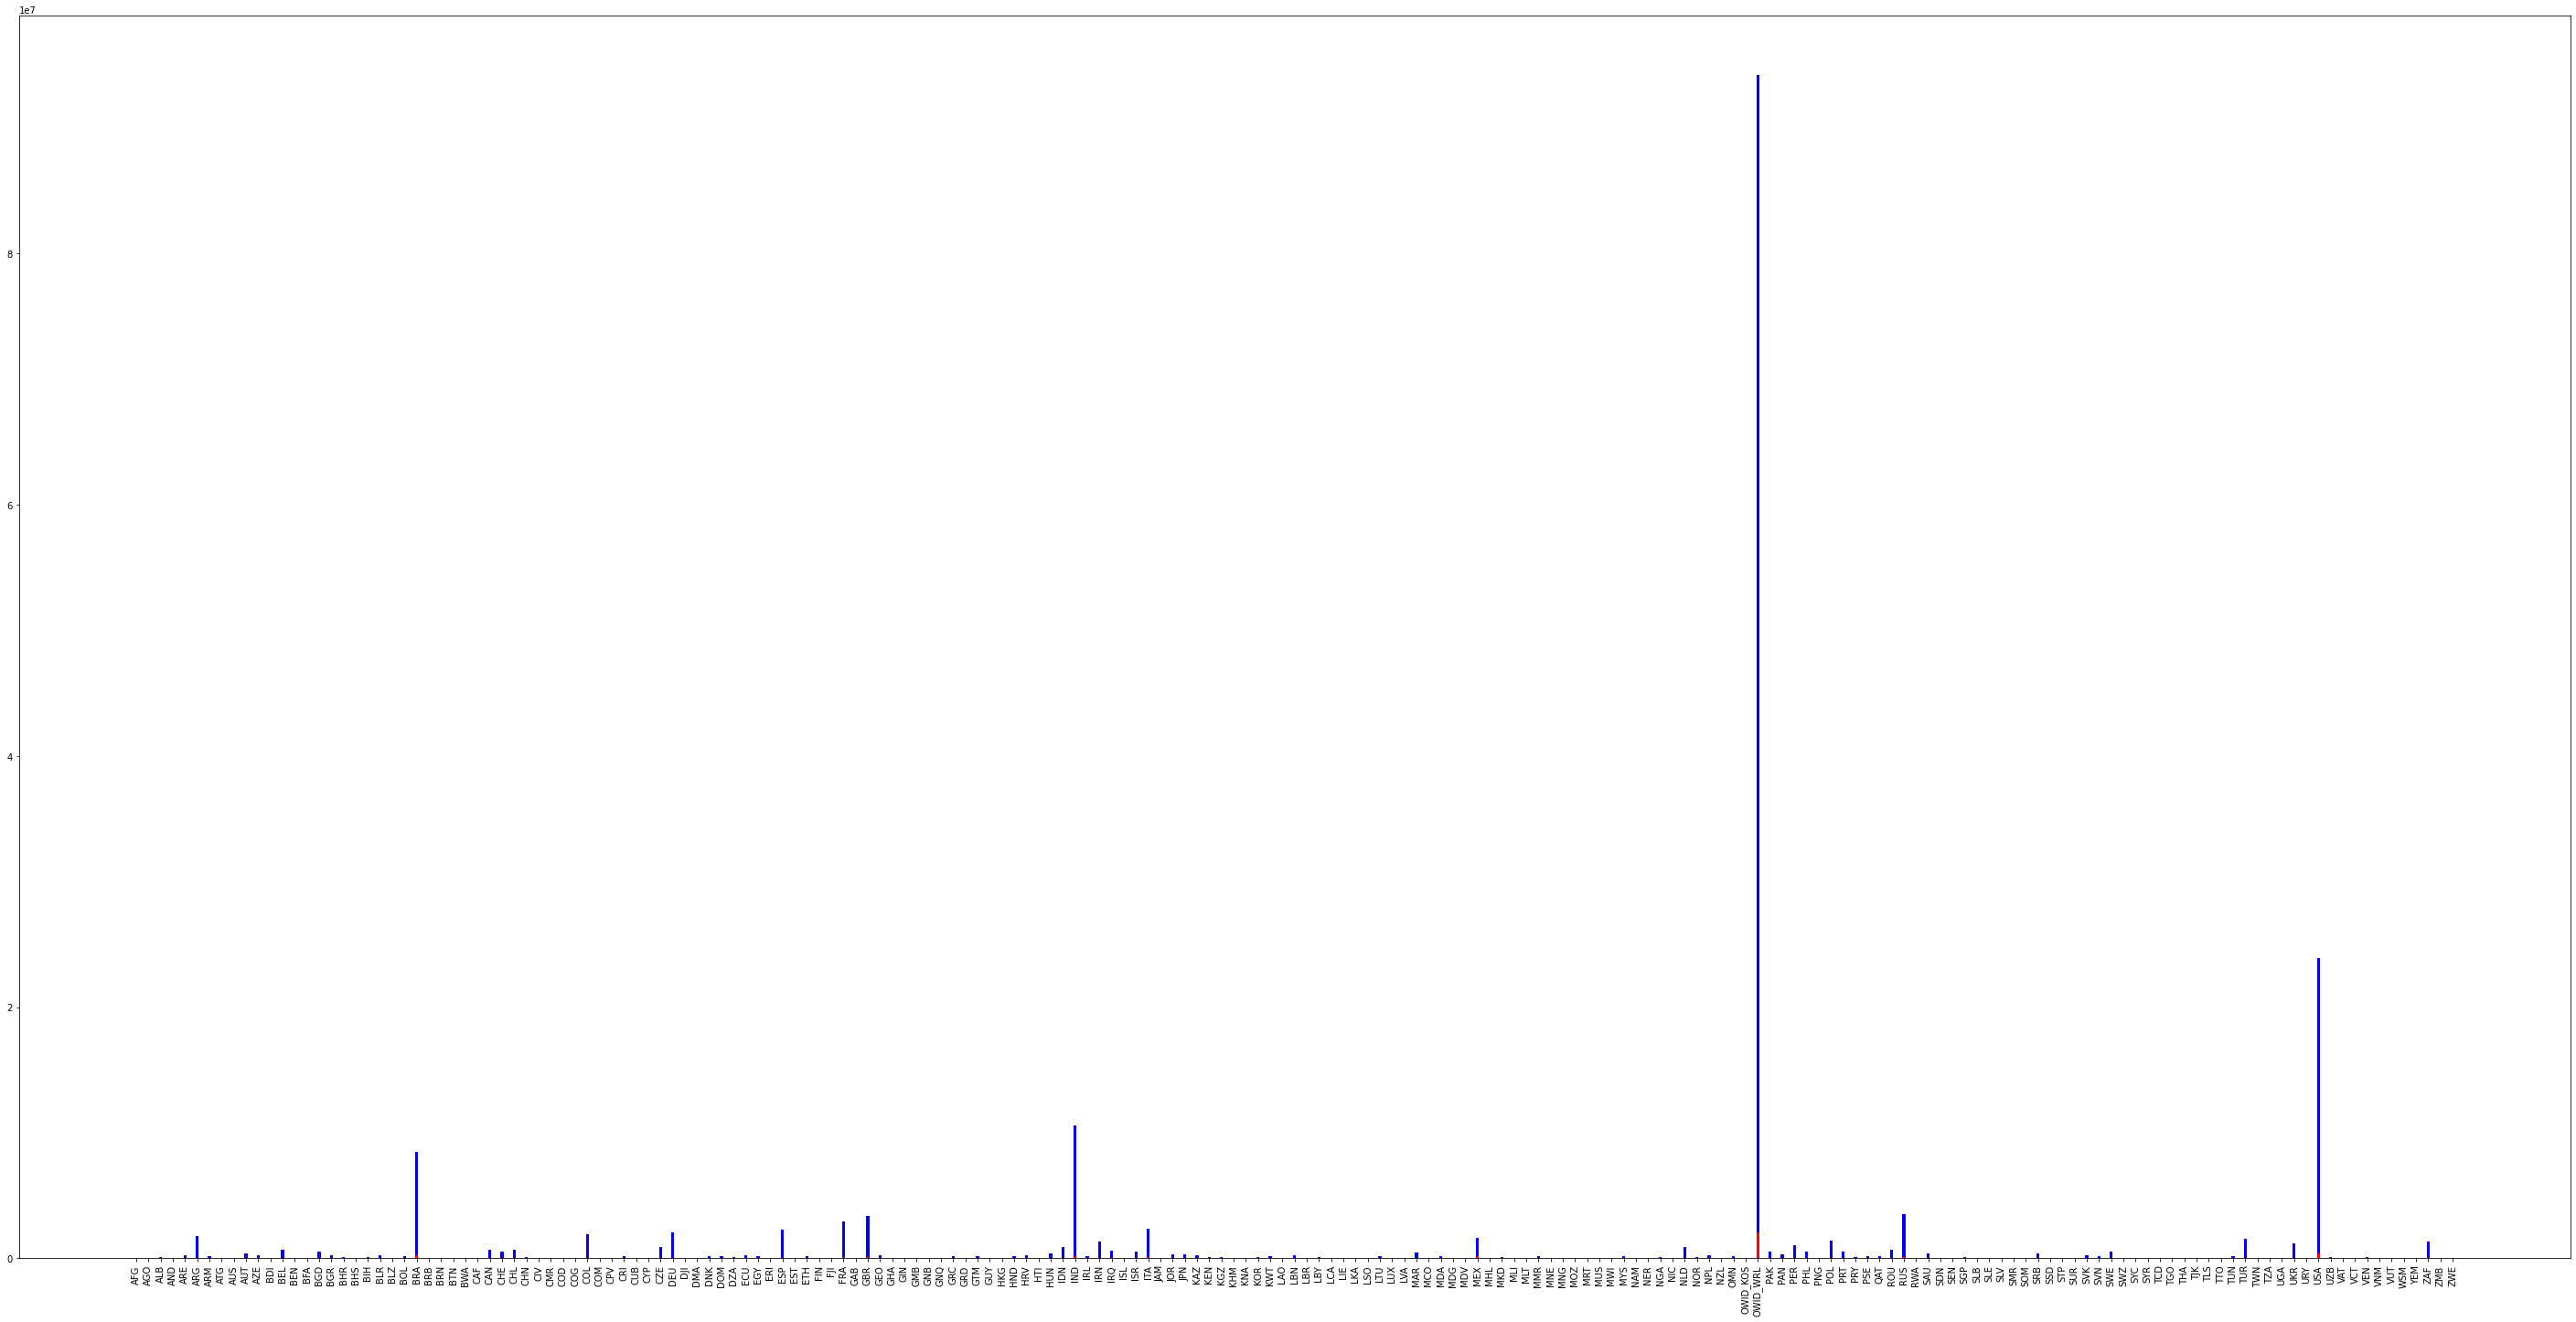

In [38]:
fig = plt.figure(figsize=(50, 25))
x = df_posicion.index
plt.bar(x, df_posicion["new_cases"], color='b', width= 0.25)
plt.bar(x, df_posicion["new_deaths"], color='r', width= 0.25)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_posicion_ven

In [29]:
#uk = world[world["iso_code"]=="GBR"]
#df.sort(['Player', 'Year', 'Tm'], ascending = [True, True, sorter])
df_posicion_rank = df_posicion.rank().sort_values(by=["new_cases", "new_deaths"], ascending=True)
df_posicion_rank

,new_cases,new_deaths
iso_code,,
HKG,1.0,6.0
VUT,2.0,6.0
WSM,3.0,6.0
MHL,4.0,6.0
SLB,5.0,6.0
...,...,...
RUS,187.0,183.0
BRA,188.0,189.0
IND,189.0,188.0


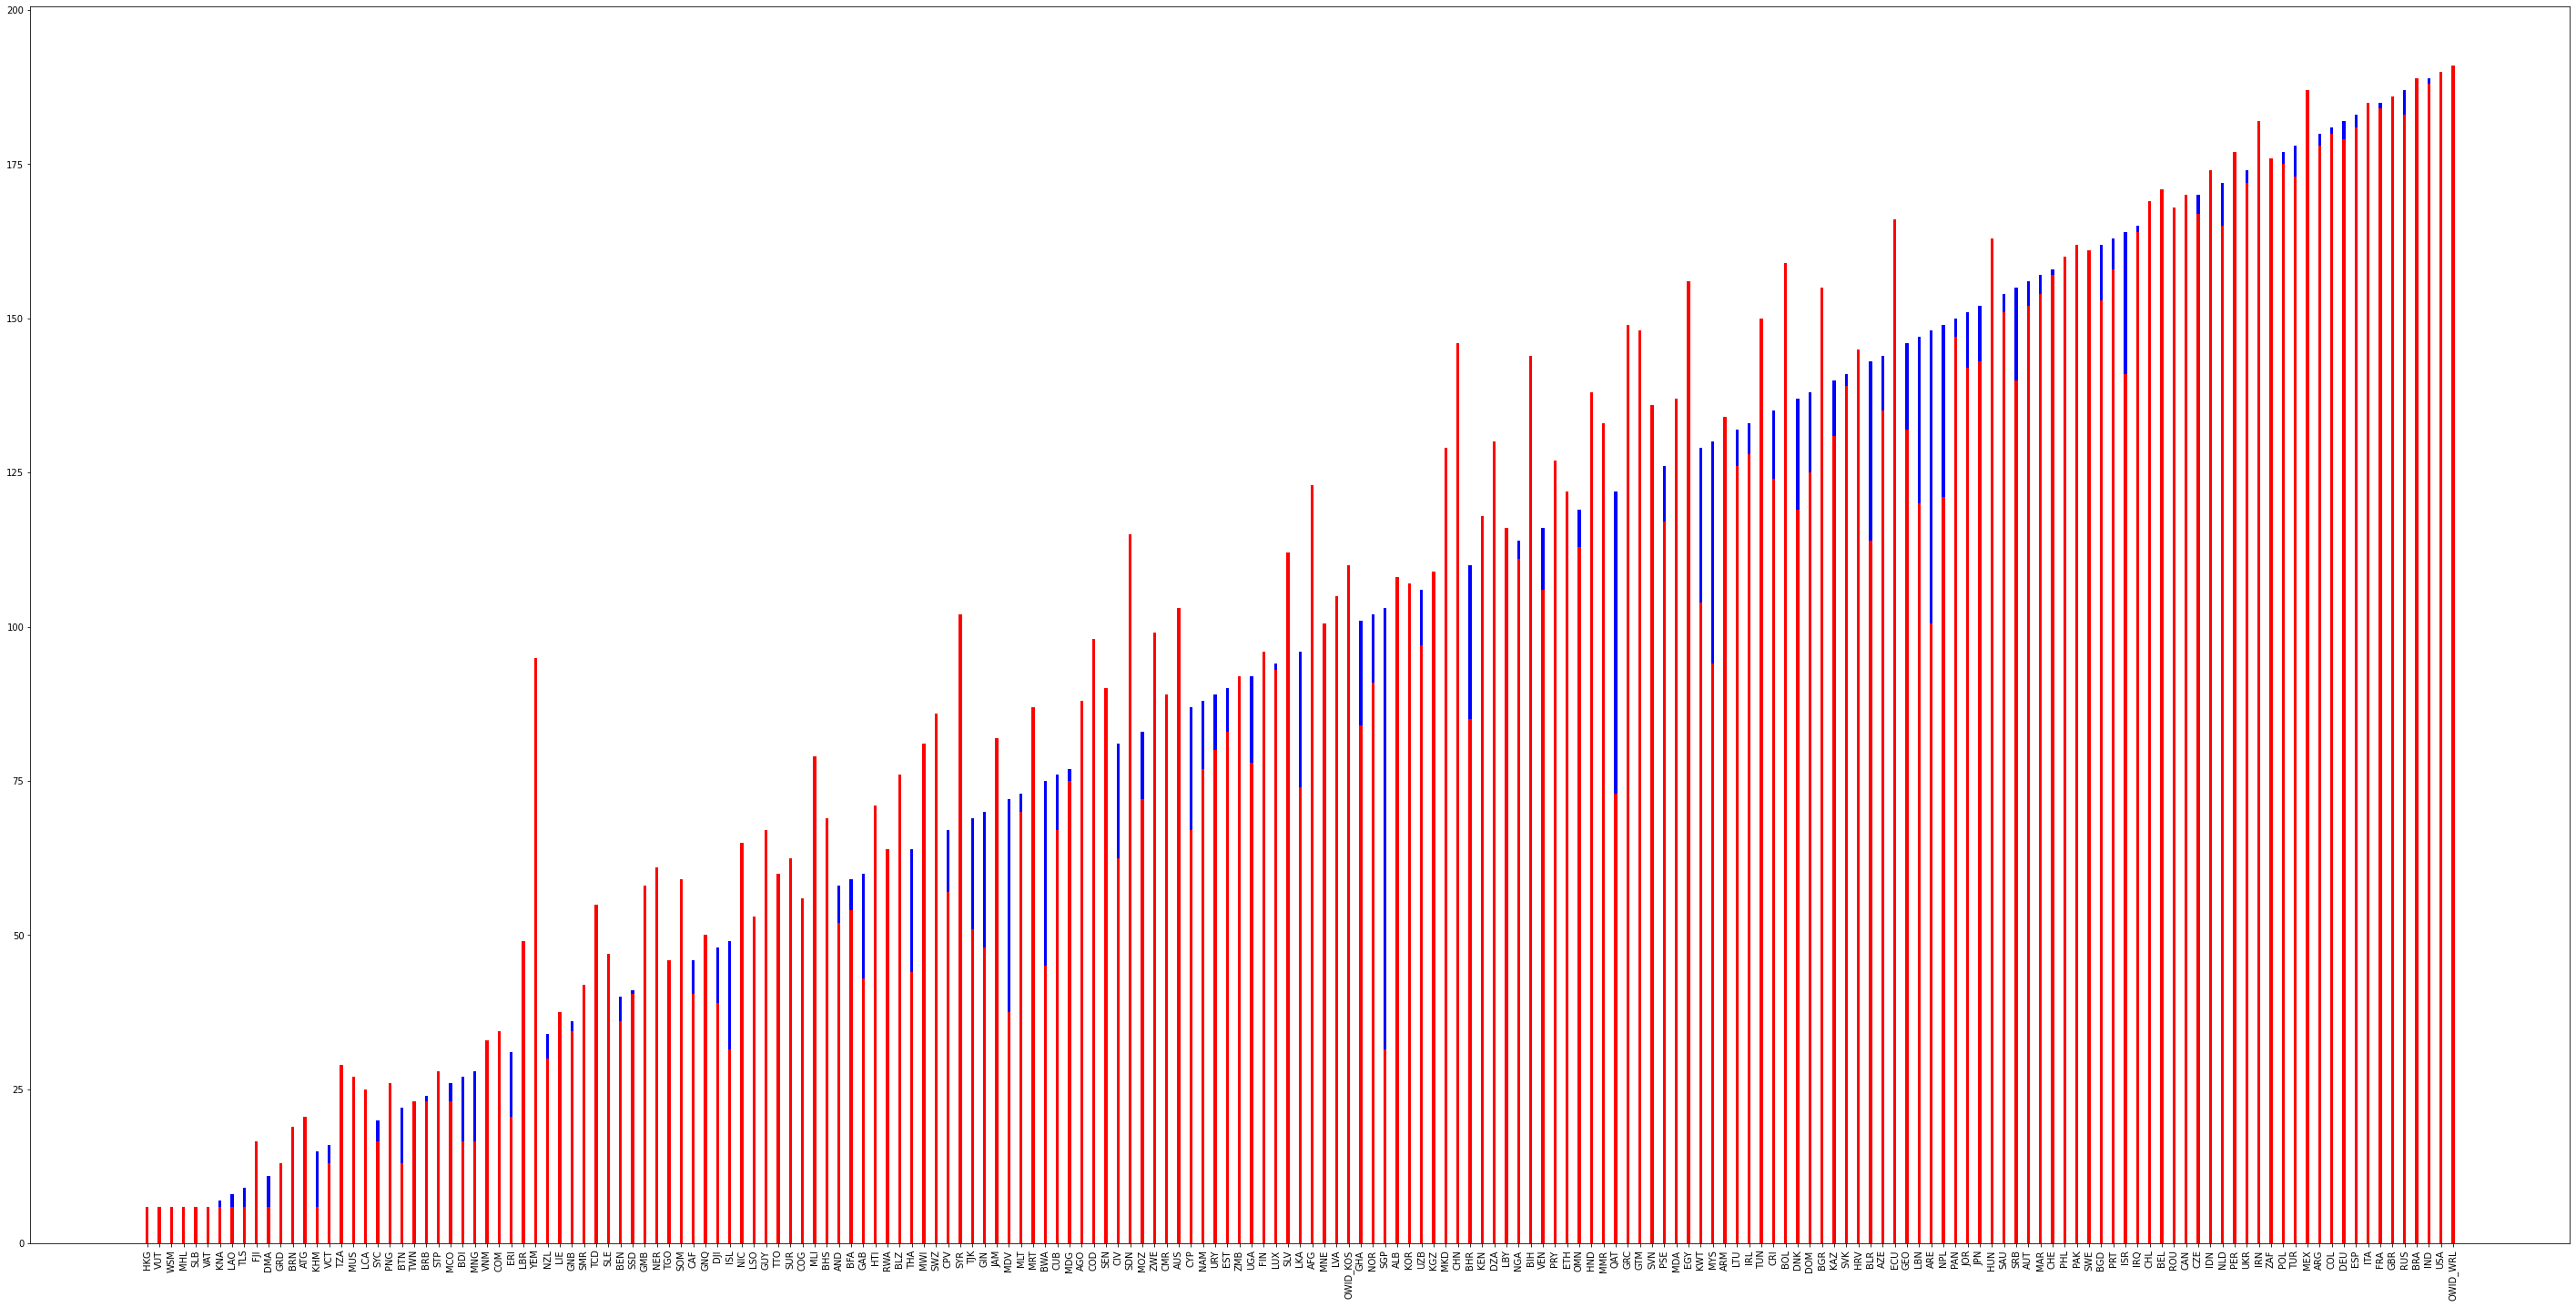

In [39]:
fig = plt.figure(figsize=(50, 25))
x = df_posicion_rank.index
plt.bar(x, df_posicion_rank["new_cases"], color='b', width= 0.25)
plt.bar(x, df_posicion_rank["new_deaths"], color='r', width= 0.25)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ven_rank = df_posicion_rank.loc["VEN"]
ven_rank


new_cases     116.0
new_deaths    106.0
Name: VEN, dtype: float64

In [50]:
esp_rank = df_posicion_rank.loc["ESP"]
esp_rank

new_cases     183.0
new_deaths    181.0
Name: ESP, dtype: float64

In [51]:
gbr_rank = df_posicion_rank.loc["GBR"]
gbr_rank

new_cases     186.0
new_deaths    186.0
Name: GBR, dtype: float64

In [52]:
tur_rank = df_posicion_rank.loc["TUR"]
tur_rank

new_cases     178.0
new_deaths    173.0
Name: TUR, dtype: float64

In [53]:
prt_rank = df_posicion_rank.loc["PRT"]
prt_rank

new_cases     163.0
new_deaths    158.0
Name: PRT, dtype: float64

In [66]:
countries_d_ranking = pd.concat([ven_rank, esp_rank, gbr_rank, tur_rank, prt_rank])
countries_d_ranking = pd.DataFrame([ven_rank, esp_rank, gbr_rank, tur_rank, prt_rank], columns=["new_cases", "new_deaths"])
countries_d_ranking = countries_d_ranking.astype(int)
countries_d_ranking = countries_d_ranking.sort_values(by="new_deaths")
countries_d_ranking

,new_cases,new_deaths
VEN,116,106
PRT,163,158
TUR,178,173
ESP,183,181
GBR,186,186


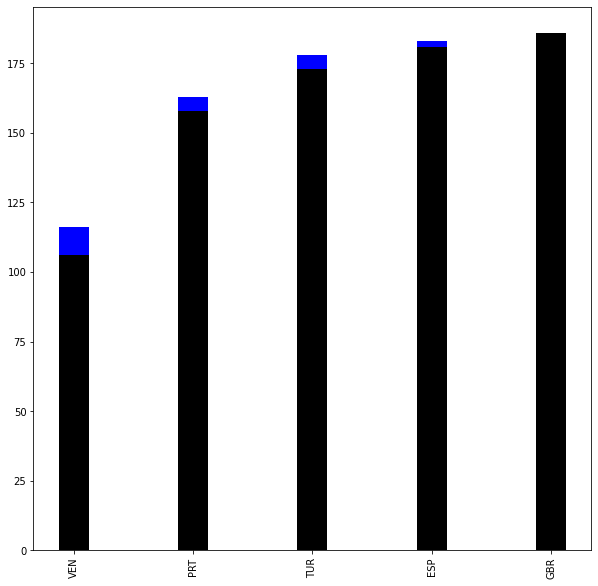

In [68]:
fig = plt.figure(figsize=(10, 10), title= "Positions vs General Ranking")
x = countries_d_ranking.index
plt.bar(x, countries_d_ranking["new_cases"], color='b', width= 0.25, annotation=)
plt.bar(x, countries_d_ranking["new_deaths"], color='k', width= 0.25)
plt.xticks(rotation='vertical')
plt.show()

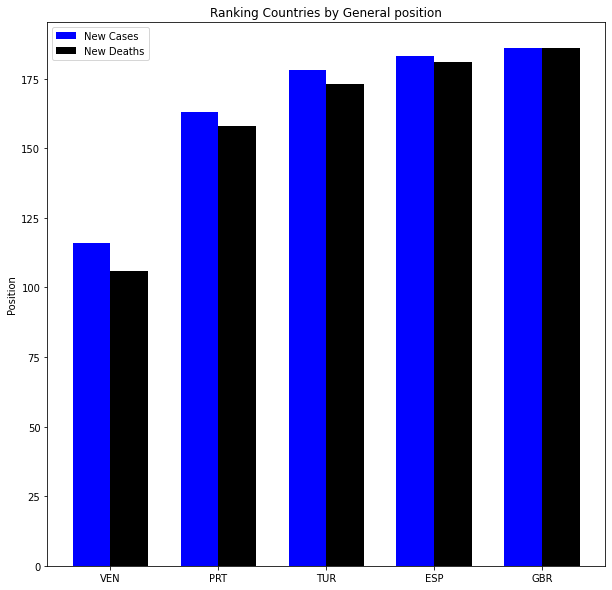

In [85]:
x = np.arange(len(countries_d_ranking.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, countries_d_ranking["new_cases"], width, label='New Cases', color='b')
rects2 = ax.bar(x + width/2, countries_d_ranking["new_deaths"], width, label='New Deaths', color='k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Position')
ax.set_title('Ranking Countries by General position')
ax.set_xticks(x)
ax.set_xticklabels(countries_d_ranking.index)
ax.legend()

In [6]:
test2_0 = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv?v=2021-01-24")
test2_0

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62042,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,736.000,879.0,54.0,41.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62043,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62044,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,630.571,962.0,45.0,42.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62045,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,589.429,974.0,12.0,41.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [7]:
test2_0["date"][-1:]

62046    2021-01-24
Name: date, dtype: object

In [8]:
test3_0 = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv?%22")
test3_0["date"][-1:]

62046    2021-01-24
Name: date, dtype: object

In [10]:
test4_0 = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
test4_0["date"][-1:]

62046    2021-01-24
Name: date, dtype: object

###**DATA DEL GROUP C**

In [12]:
grupoC = pd.read_json("http://apiprojectdata.ddns.net:5000/token:C98453658")
grupoC

,t_c_averages
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2021-01-20,3005586.6
2021-01-21,3033158.8
2021-01-22,3059673.8
2021-01-23,3078481.2


In [13]:
grupoC.isnull().sum()

t_c_averages    31
dtype: int64

In [14]:
grupoC = grupoC.dropna(how = "any")
grupoC

,t_c_averages
2020-02-01,1.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,1.0
2020-02-05,1.0
...,...
2021-01-20,3005586.6
2021-01-21,3033158.8
2021-01-22,3059673.8
2021-01-23,3078481.2


In [15]:
grupoC.index

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24'],
              dtype='datetime64[ns]', length=359, freq=None)

In [16]:
grupoC.columns

Index(['t_c_averages'], dtype='object')

Text(0.5, 1.0, 'Json Group C')

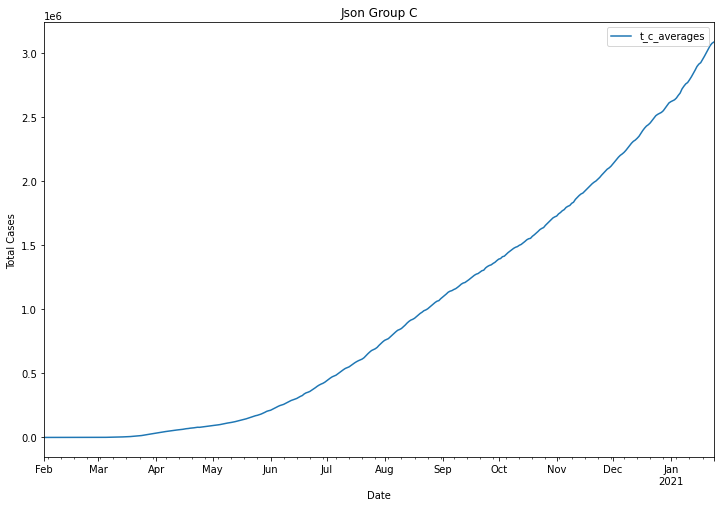

In [25]:
total_cases = grupoC.plot(figsize=(12,8))
total_cases.set_xlabel("Date")
total_cases.set_ylabel("Total Cases")
total_cases.set_title("Json Group C")

In [ ]:
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()